### 1. Statistical data analysis/Modeling

### 1.1 Descriptive Modeling

### 1.1.1 Arrivals

### Here is some background

A ﬁle, transactions.txt, contains a transactional data dump of students entering and leaving at the University Road drop-oﬀ gate. That is, the entrance closest to the Engineering buildings. There are three turnstiles. The ﬁrst is North, denoted with ‘N’, and is closest to the Mineral Sciences Building. The second is in the centre, denoted with ‘C’, and closest to the Mining Engineering Study Centre. The third is South, denoted by ‘S’, and is closest to the Engineering II Building.

The time stamp indicates the date and time as dd/mm/yyyy HH:MM:SS. There is a variable indicating whether this is an entry into the campus or an exit leaving the campus. The Success variable indicates a true if the transaction was completed with only ONE tap of the student card, and false if two or more taps were required. The ﬁnal variable indicates the system’s estimate for the entry or exit transaction duration (in seconds). That is the time from when a student’s card is ﬁrst tapped until the turnstile is activated and locked again behind the student

### Objective: 

- Cleaning the data and making it workable.
- The distribution best describes the transaction duration for the entire data set.
- Confidence limits for the mean of the transaction duration of the entire data set.
- Total number of entries and exits through each turnstile.
- Success transaction on each turnstile.
- Which Turnstile has lower usage?


### Solution methodology

First thing to do is to upload the data and check if wrangling(cleaning) will be required before further analysis.

In [317]:
import numpy as np
import pandas as pd

In [318]:
with open('transactions.txt') as trans:
    raw_data = trans.read()
    

In [319]:
print(raw_data)

:==============================================================================:
| This file contains a transactional data dump of students entering and leaving|
| at the University Road drop-off gate. That is, the entrance closest to the   |
| Engineering buildings. There are three turnstiles. The first is North,       |
| denoted with 'N', and is closest to the Mineral Sciences Building. The second|
| is in the centre, denoted with 'C', and closest to the Mining Engineering    |
| Study Centre. The third is South, denoted by 'S', and is closest to the      |
| Engineering 2 Building.                                                      |
|                                                                              |
| The time stamp indicates the date and time as day/month/year HH:MM:SS. There |
| is a variable indicating whether this is an 'entry' into the campus or an    |
| 'exit' leaving the campus. The 'success' variable indicates a 'true' if the  |
| transaction was completed 

The data is not workable at this point. It contains delimiters and three paragraphs above the data table. Cleaning this data on python was very challenging, struggled a lot, then I decided to clean the data using "R", then converted it to a csv file I can import on python. Here is the code below.

##### '''R code I used to clean the data (making it more workable, then converted it to csv file'''

In [320]:
import pandas as pd
import os

In [321]:
path = os.getcwd()
path

'C:\\Users\\Bmathedimosa\\Documents'

In [322]:

Data_frame = pd.read_csv('C:\\Users\\Bmathedimosa\\Documents\\filtered_data.csv', skipinitialspace = True)
Data_frame

,Unnamed: 0,Date,Type,Turnstile,Success,Duration (s)
0,1,24/02/2020 00:00:34,exit,C,True,5.28
1,2,24/02/2020 00:00:35,exit,C,True,4.21
2,3,24/02/2020 00:00:36,exit,N,True,7.43
3,4,24/02/2020 00:00:37,entry,S,True,6.76
4,5,24/02/2020 00:00:38,exit,N,True,6.15
...,...,...,...,...,...,...
7764,7765,24/02/2020 00:00:7798,exit,N,True,5.72
7765,7766,24/02/2020 00:00:7799,exit,N,True,5.91
7766,7767,24/02/2020 00:00:7800,exit,C,True,7.48
7767,7768,24/02/2020 00:00:7801,entry,S,True,6.30


In [323]:
Data_frame.head(6)

,Unnamed: 0,Date,Type,Turnstile,Success,Duration (s)
0,1,24/02/2020 00:00:34,exit,C,True,5.28
1,2,24/02/2020 00:00:35,exit,C,True,4.21
2,3,24/02/2020 00:00:36,exit,N,True,7.43
3,4,24/02/2020 00:00:37,entry,S,True,6.76
4,5,24/02/2020 00:00:38,exit,N,True,6.15
5,6,24/02/2020 00:00:39,exit,C,True,4.39


In [324]:
Data_frame.tail(6)

,Unnamed: 0,Date,Type,Turnstile,Success,Duration (s)
7763,7764,24/02/2020 00:00:7797,exit,C,True,7.55
7764,7765,24/02/2020 00:00:7798,exit,N,True,5.72
7765,7766,24/02/2020 00:00:7799,exit,N,True,5.91
7766,7767,24/02/2020 00:00:7800,exit,C,True,7.48
7767,7768,24/02/2020 00:00:7801,entry,S,True,6.30
7768,7769,24/02/2020 00:00:7802,exit,S,True,5.05


Now the data is fine and looks exactly as it does when viewing via excel. I am happy.

But now, I would like to drop the redundant first two columns (appearing as "Unnamed: 0") such that my data table only contains columns Date, Type, Turnstile, success and Duration.

In [325]:
Clean_data = Data_frame.drop(columns = "Unnamed: 0")
Clean_data

,Date,Type,Turnstile,Success,Duration (s)
0,24/02/2020 00:00:34,exit,C,True,5.28
1,24/02/2020 00:00:35,exit,C,True,4.21
2,24/02/2020 00:00:36,exit,N,True,7.43
3,24/02/2020 00:00:37,entry,S,True,6.76
4,24/02/2020 00:00:38,exit,N,True,6.15
...,...,...,...,...,...
7764,24/02/2020 00:00:7798,exit,N,True,5.72
7765,24/02/2020 00:00:7799,exit,N,True,5.91
7766,24/02/2020 00:00:7800,exit,C,True,7.48
7767,24/02/2020 00:00:7801,entry,S,True,6.30


In [326]:
# clean_df = Clean_data.rename(columns={Clean_data.columns[0]: "Date",
#                                       Clean_data.columns[1]: "Type", 
#                                      Clean_data.columns[2]: "Turnstile", 
#                                      Clean_data.columns[3]: "Success", 
#                                      Clean_data.columns[4]: "Duration"})
# clean_df

Good to go: Can now start analysing and interpreting the data as per mentioned objective above.

-  An overview statistic summary of the data: distribution best describes the transaction duration for the entire data set


In [327]:
import matplotlib.pyplot as plt

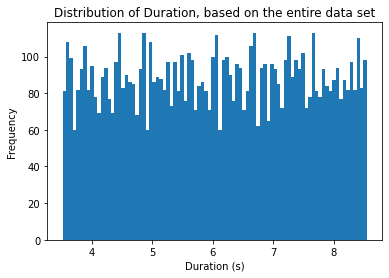

In [328]:
bins_duration = int((7769)**0.5)

plt.hist(clean_df.Duration, bins = bins_duration)
plt.title('Distribution of Duration, based on the entire data set')
plt.xlabel('Duration (s)')
plt.ylabel('Frequency')
plt.show()


In [329]:
clean_df.Duration.describe() # The .describe() gives a static summary of the data

count    7769.000000
mean        6.047764
std         1.453081
min         3.520000
25%         4.800000
50%         6.060000
75%         7.310000
max         8.550000
Name: Duration, dtype: float64

- Based on the distribution of the numerical (Duration) evaluation of the data: - The data depict Uniform distribution with a mean = 6.048s, standard deviation = 1.45s, min = 3.52s, max =8.55s, as seen above. The unit is "seconds" (s)

- Confidence limits for the mean of the transaction duration of the entire data set.

In [330]:
import scipy.stats as st

In [331]:
st.t.interval(alpha = 0.99, df = len(clean_df.Duration) -1, loc =np.mean(clean_df.Duration),
             scale =st.sem(clean_df.Duration))


(6.005289420712236, 6.090238961318949)

- We can breakdown the data futher to determine number of entries/Exits on each turnstile individually. Will do this for the 'N', Turnstile for the purpose of demonstration, however, the same analogy is applicable for the rest of the Turnstiles as well.

In [332]:
#Total transactions per Turnstile, both entry and exit combined
clean_df.groupby('Turnstile').Type.count()

Turnstile
C    3880
N    1351
S    2538
Name: Type, dtype: int64

- From above, it is clear that the Northern Turnstile has the lowest usage

In [333]:
N_turnstile_df = clean_df[clean_df.Turnstile == 'N']
exits_N = N_turnstile_df[N_turnstile_df.Type == 'exit'].count()[2]
entries_N = N_turnstile_df[N_turnstile_df.Type == 'entry'].count()[2]
print("Total entries through the 'N'Turnstile is: ", entries_N)
print("Total exits through the 'N'Turnstile is: ", exits_N)

Total entries through the 'N'Turnstile is:  660
Total exits through the 'N'Turnstile is:  691
